In [ ]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281.jpg   
  inflating: te

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_augm = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_augm = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_augm.flow_from_directory('/content/train',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_augm.flow_from_directory('/content/test',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3), activation = 'relu' ,input_shape = (120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
70/70 [==============================] - 14s 189ms/step - loss: 1.2149 - accuracy: 0.5745 - val_loss: 0.6906 - val_accuracy: 0.5357
Epoch 2/10
70/70 [==============================] - 12s 176ms/step - loss: 0.5647 - accuracy: 0.7127 - val_loss: 0.6342 - val_accuracy: 0.6929
Epoch 3/10
70/70 [==============================] - 13s 184ms/step - loss: 0.4911 - accuracy: 0.7864 - val_loss: 0.6518 - val_accuracy: 0.6500
Epoch 4/10
70/70 [==============================] - 13s 182ms/step - loss: 0.3429 - accuracy: 0.8689 - val_loss: 0.6042 - val_accuracy: 0.7000
Epoch 5/10
70/70 [==============================] - 13s 179ms/step - loss: 0.2728 - accuracy: 0.8959 - val_loss: 0.9129 - val_accuracy: 0.6071
Epoch 6/10
70/70 [==============================] - 13s 188ms/step - loss: 0.2501 - accuracy: 0.9156 - val_loss: 0.7602 - val_accuracy: 0.6571
Epoch 7/10
70/70 [==============================] - 13s 179ms/step - loss: 0.2244 - accuracy: 0.9156 - val_loss: 0.7663 - val_accuracy: 0.6500

In [ ]:
model.save('catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
imge = image.load_img("/content/test/cats/cat_468.jpg",target_size=(120,120))

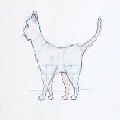

In [ ]:
imge

In [ ]:
imge = image.img_to_array(imge)

In [ ]:
imge

array([[[241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [245., 246., 251.],
        [245., 246., 250.],
        [245., 246., 248.]],

       [[241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [245., 246., 251.],
        [245., 246., 250.],
        [245., 246., 248.]],

       [[241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [245., 246., 251.],
        [245., 246., 250.],
        [245., 246., 248.]],

       ...,

       [[239., 239., 241.],
        [239., 239., 241.],
        [239., 239., 241.],
        ...,
        [245., 246., 251.],
        [245., 246., 251.],
        [242., 245., 250.]],

       [[239., 239., 241.],
        [239., 239., 241.],
        [239., 239., 241.],
        ...,
        [245., 246., 251.],
        [245., 246., 251.],
        [242., 245., 250.]],

       [[239., 239., 241.],
        [239., 239., 241.],
        [239., 2

In [ ]:
imge = np.expand_dims(imge,axis=0)

In [ ]:
imge

array([[[[241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 241.],
         ...,
         [245., 246., 251.],
         [245., 246., 250.],
         [245., 246., 248.]],

        [[241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 241.],
         ...,
         [245., 246., 251.],
         [245., 246., 250.],
         [245., 246., 248.]],

        [[241., 241., 241.],
         [241., 241., 241.],
         [241., 241., 241.],
         ...,
         [245., 246., 251.],
         [245., 246., 250.],
         [245., 246., 248.]],

        ...,

        [[239., 239., 241.],
         [239., 239., 241.],
         [239., 239., 241.],
         ...,
         [245., 246., 251.],
         [245., 246., 251.],
         [242., 245., 250.]],

        [[239., 239., 241.],
         [239., 239., 241.],
         [239., 239., 241.],
         ...,
         [245., 246., 251.],
         [245., 246., 251.],
         [242., 245., 250.]],

        [[239., 239., 241.],
       

In [ ]:
pred = np.argmax(model.predict(imge))

1/1 [==============================] - 0s 34ms/step


In [ ]:
if(pred==1):
  print("Dog")
else:
  print("Cat")

Cat
